# Assignment Part-I
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.
The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
The company wants to know the following things about the prospective properties:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.
Also, determine the optimal value of lambda for ridge and lasso regression.

#### Business Goal 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.



# Flow of the Assignment

1. Data exploration and understanding
2. Data cleaning
3. Data preparation
4. Split the data into train and test set
5. Ridge regression
6. Lasso regression
7. Conclusion

## 1. Data exploration and understanding
Will look at the dataset and understand the size, attribute names etc.

In [1]:
#lets import the necessary libraries required for predictions

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset
house = pd.read_csv("train.csv",encoding = 'latin')

In [3]:
#identifying top 5 rows
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#identify the shape of dataset
house.shape

(1460, 81)

In [5]:
#dataset info
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
#identifying other attributes of the dataset using describe function
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# all numeric (float and int) variables in the dataset
house_numeric = house.select_dtypes(include=['float64', 'int64'])
house_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [8]:
#house numeric info
house_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

## 2. Data cleaning

#### identifying the null values of categorical variables and removing/imputing those values

In [9]:
house.select_dtypes(include='object').isnull().sum()[house.select_dtypes(include='object').isnull().sum()>0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [10]:
# Will replace the NA with None

for col in ('Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'Electrical'):
    
    house[col]=house[col].fillna('None')

In [11]:
house.select_dtypes(include='object').isnull().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

In [12]:
#To avoid skewdness in the categorical variables will drop the variables/attributes
#Will remove those attributes having more than 85% of the values

def largeCategoricalValueCounts():
    column = []
    categorical_columns = house.select_dtypes(include=['object'])
    for col in (categorical_columns):
        if(house[col].value_counts().max() >= 1241):
            column.append(col)
    return column

removedColumns = largeCategoricalValueCounts()

# Remove the columns with skewed data

house.drop(removedColumns, axis = 1, inplace = True)

house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,None,0,2,2008,Normal,208500
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,0,None,0,5,2007,Normal,181500
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,None,0,9,2008,Normal,223500
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,272,0,0,0,None,0,2,2006,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,0,0,None,0,12,2008,Normal,250000


#### identifying the null values of numerical variables and removing/imputing those values


In [13]:
house.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
LotShape           0
LotConfig          0
Neighborhood       0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         8
ExterQual          0
Foundation         0
BsmtQual           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
HeatingQC          0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        0
TotRmsAbvGrd       0
Fireplaces         0
FireplaceQu        0
GarageType         0
GarageYrBlt       81
GarageFinish       0
GarageCars         0
GarageArea   

In [14]:
house.select_dtypes(include=['int64','float']).isnull().sum()[house.select_dtypes(include=['int64','float']).isnull().sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [15]:
# null values are imputed to attributes LotFrontage and MasVnrArea

house['LotFrontage'] = house['LotFrontage'].replace(np.nan, house['LotFrontage'].median())
house['MasVnrArea'] = house['MasVnrArea'].replace(np.nan, house['MasVnrArea'].median())

In [16]:
#With respect to GarageYrBlt, will impute with 0.  
#imputed the 0 value
house['GarageYrBlt']=house['GarageYrBlt'].fillna(0)
house['GarageYrBlt'] = house['GarageYrBlt'].astype(int)

In [17]:
#Identifying the garage build new and old. Previously imputed zero will be automatically considered as old
def GarageConstructionPeriod(row):
    if row == 0:
        return 0
#if garage is build before 2000 will be considered as old (0) else new (1)
    elif row >= 1900 and row < 2000:        
        return 0
    else:   
        return 1
    
#separate Old_NewGarage is created
house['Old_NewGarage'] = house['GarageYrBlt'].apply(GarageConstructionPeriod)
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,Old_NewGarage
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,0,None,0,2,2008,Normal,208500,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,None,0,5,2007,Normal,181500,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,0,None,0,9,2008,Normal,223500,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,0,0,None,0,2,2006,Abnorml,140000,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,0,None,0,12,2008,Normal,250000,1


In [18]:
house.select_dtypes(include=['int64','float']).isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
Old_NewGarage    0
dtype: int64

In [19]:
#Looking at attributes we could create a new column wheter remodelled or not based on the year built and year modified

def whetherRemodelled(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return 2
    
house['Remodelled'] = house.apply(whetherRemodelled, axis=1)
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,Old_NewGarage,Remodelled
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,2,2008,Normal,208500,1,0
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,None,0,5,2007,Normal,181500,0,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,9,2008,Normal,223500,1,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,0,None,0,2,2006,Abnorml,140000,0,1
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,None,0,12,2008,Normal,250000,1,0


In [20]:
# identifying built age at the time of selling

def builtOremodelledAge(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
       
house['Built_RemodelAge'] = house.apply( builtOremodelledAge, axis=1)
house.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,Old_NewGarage,Remodelled,Built_RemodelAge
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,None,0,2,2008,Normal,208500,1,0,5
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,None,0,5,2007,Normal,181500,0,0,31
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,None,0,9,2008,Normal,223500,1,1,6
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,None,0,2,2006,Abnorml,140000,0,1,36
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,None,0,12,2008,Normal,250000,1,0,8


In [21]:
#now we can drop these not required features
house.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)

In [22]:
#column id is not needed, so we can drop this too
house.drop(['Id'], axis = 1, inplace = True)

In [23]:
house.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,SaleCondition,SalePrice,Old_NewGarage,Remodelled,Built_RemodelAge
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,...,0,0,None,0,2,Normal,208500,1,0,5
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,...,0,0,None,0,5,Normal,181500,0,0,31


In [24]:
#As we did for categorical variables, here we drop variables with value counts higher than 85% (1241/1450)*100=85%
#to avoid extremeties 
def highNumericalvaluecounts():
    column = []
    numerical_columns = house.select_dtypes(include=['int64', 'float'])
    for col in (numerical_columns):
        if(house[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = highNumericalvaluecounts()
house.drop(columnsToBeRemoved, axis = 1, inplace = True)

house.drop(['MoSold'], axis = 1, inplace = True)

house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,Old_NewGarage,Remodelled,Built_RemodelAge
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,...,2,548,0,61,None,Normal,208500,1,0,5
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,...,2,460,298,0,None,Normal,181500,0,0,31
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,...,2,608,0,42,None,Normal,223500,1,1,6
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,...,3,642,0,35,None,Abnorml,140000,0,1,36
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,...,3,836,192,84,None,Normal,250000,1,0,8


#### Handling the outliers

In [25]:
#Check outliers at 25%, 50%, 75%, 90%, 95%, 98% and above in the housing dataset
house.describe(percentiles=[.25,.5,.75,.90,.95,.99])


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,Old_NewGarage,Remodelled,Built_RemodelAge
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,103.117123,443.639726,567.240411,1057.429452,1162.626712,...,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,180921.195890,0.275342,0.476712,22.950000
std,42.300571,22.027677,9981.264932,1.382997,1.112799,180.731373,456.098091,441.866955,438.705324,386.587738,...,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,79442.502883,0.446840,0.499629,20.640653
min,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,0.000000,-1.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,223.000000,795.750000,882.000000,...,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,129975.000000,0.000000,0.000000,4.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,477.500000,991.500000,1087.000000,...,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,163000.000000,0.000000,0.000000,14.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,808.000000,1298.250000,1391.250000,...,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,214000.000000,1.000000,1.000000,41.000000
90%,120.000000,92.000000,14381.700000,8.000000,7.000000,335.000000,1065.500000,1232.000000,1602.200000,1680.000000,...,9.000000,1.000000,3.000000,757.100000,262.000000,130.000000,278000.000000,1.000000,1.000000,56.000000
95%,160.000000,104.000000,17401.150000,8.000000,8.000000,456.000000,1274.000000,1468.000000,1753.000000,1831.250000,...,10.000000,2.000000,3.000000,850.100000,335.000000,175.050000,326100.000000,1.000000,1.000000,58.000000
99%,190.000000,137.410000,37567.640000,10.000000,9.000000,791.280000,1572.410000,1797.050000,2155.050000,2219.460000,...,11.000000,2.000000,3.000000,1002.790000,505.460000,285.820000,442567.010000,1.000000,1.000000,60.000000


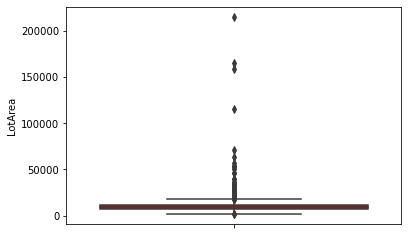

In [26]:
sns.boxplot(y = 'LotArea', palette='gist_heat', data = house)
plt.show;

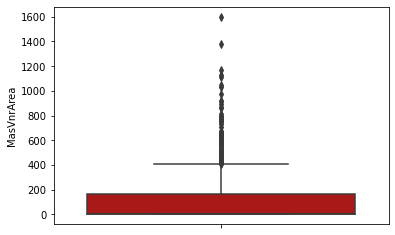

In [27]:
sns.boxplot(y = 'MasVnrArea', palette='gist_heat', data = house)
plt.show;

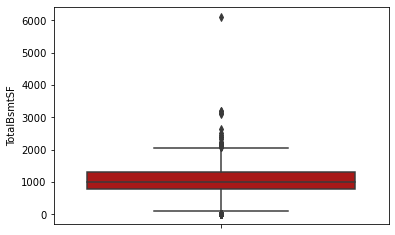

In [28]:
sns.boxplot(y = 'TotalBsmtSF', palette='gist_heat', data = house)
plt.show;

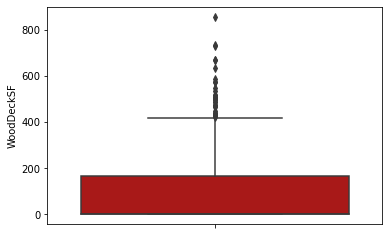

In [29]:
sns.boxplot(y = 'WoodDeckSF', palette='gist_heat', data = house)
plt.show;

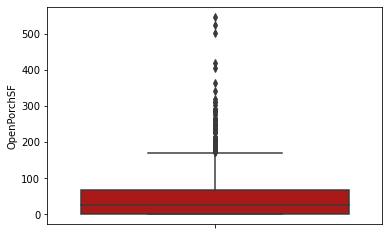

In [30]:
sns.boxplot(y = 'OpenPorchSF', palette='gist_heat', data = house)
plt.show;

#### Remove the outliers which are 98% and above

In [31]:
nn_quartile_LotArea = house['LotArea'].quantile(0.98)
house = house[house["LotArea"] < nn_quartile_LotArea]

nn_quartile_MasVnrArea = house['MasVnrArea'].quantile(0.98)
house = house[house["MasVnrArea"] < nn_quartile_MasVnrArea]

nn_quartile_TotalBsmtSF = house['TotalBsmtSF'].quantile(0.99)
house = house[house["TotalBsmtSF"] < nn_quartile_TotalBsmtSF]

nn_quartile_WoodDeckSF = house['WoodDeckSF'].quantile(0.99)
house =house[house["WoodDeckSF"] < nn_quartile_WoodDeckSF]

nn_quartile_OpenPorchSF = house['OpenPorchSF'].quantile(0.99)
house = house[house["OpenPorchSF"] < nn_quartile_OpenPorchSF]

In [32]:
num_data = round(100*(len(house)/1460),2)
print(num_data)

93.01


In [33]:
house.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'Fence', 'SaleCondition', 'SalePrice',
       'Old_NewGarage', 'Remodelled', 'Built_RemodelAge'],
      dtype='object')

In [34]:
#check correlation of the numerical variables
corr=house.corr()
corr

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,Old_NewGarage,Remodelled,Built_RemodelAge
MSSubClass,1.000000,-0.401931,-0.393699,0.060222,-0.059830,0.024548,-0.071873,-0.129118,-0.245604,-0.253736,...,0.051450,-0.031299,-0.040892,-0.105249,-0.030496,0.004843,-0.069081,0.040748,-0.047843,-0.048133
LotFrontage,-0.401931,1.000000,0.570154,0.190775,-0.051785,0.162426,0.107511,0.141324,0.288790,0.344437,...,0.305140,0.203051,0.272192,0.304673,0.079295,0.134818,0.344203,0.078414,-0.046754,-0.065145
LotArea,-0.393699,0.570154,1.000000,0.171768,-0.005919,0.096369,0.142376,0.092427,0.287169,0.391483,...,0.370356,0.308544,0.258948,0.296699,0.136089,0.133542,0.377013,-0.017580,0.002721,-0.039391
OverallQual,0.060222,0.190775,0.171768,1.000000,-0.088590,0.366129,0.193002,0.285256,0.507715,0.429465,...,0.386576,0.377691,0.586480,0.539509,0.219328,0.358891,0.800134,0.563296,-0.100826,-0.548074
OverallCond,-0.059830,-0.051785,-0.005919,-0.088590,1.000000,-0.125851,-0.017521,-0.143153,-0.162739,-0.136004,...,-0.047843,-0.011391,-0.177895,-0.136103,0.003890,-0.055243,-0.068653,-0.290144,0.317140,-0.073388
MasVnrArea,0.024548,0.162426,0.096369,0.366129,-0.125851,1.000000,0.213629,0.086560,0.307658,0.299629,...,0.241253,0.224874,0.336142,0.338542,0.123847,0.164114,0.407368,0.165754,-0.162473,-0.142217
BsmtFinSF1,-0.071873,0.107511,0.142376,0.193002,-0.017521,0.213629,1.000000,-0.558481,0.427601,0.348825,...,-0.038561,0.204278,0.189729,0.230009,0.195079,0.064733,0.354492,0.011541,-0.126288,-0.121970
BsmtUnfSF,-0.129118,0.141324,0.092427,0.285256,-0.143153,0.086560,-0.558481,1.000000,0.437582,0.311913,...,0.238135,0.039859,0.204051,0.175354,-0.040374,0.137854,0.203009,0.335792,0.031564,-0.174480
TotalBsmtSF,-0.245604,0.288790,0.287169,0.507715,-0.162739,0.307658,0.427601,0.437582,1.000000,0.770977,...,0.214726,0.277055,0.421145,0.444024,0.202218,0.224610,0.606054,0.329473,-0.110048,-0.303012
1stFlrSF,-0.253736,0.344437,0.391483,0.429465,-0.136004,0.299629,0.348825,0.311913,0.770977,1.000000,...,0.361194,0.360585,0.419848,0.447568,0.188469,0.182961,0.584060,0.217796,-0.042623,-0.242892


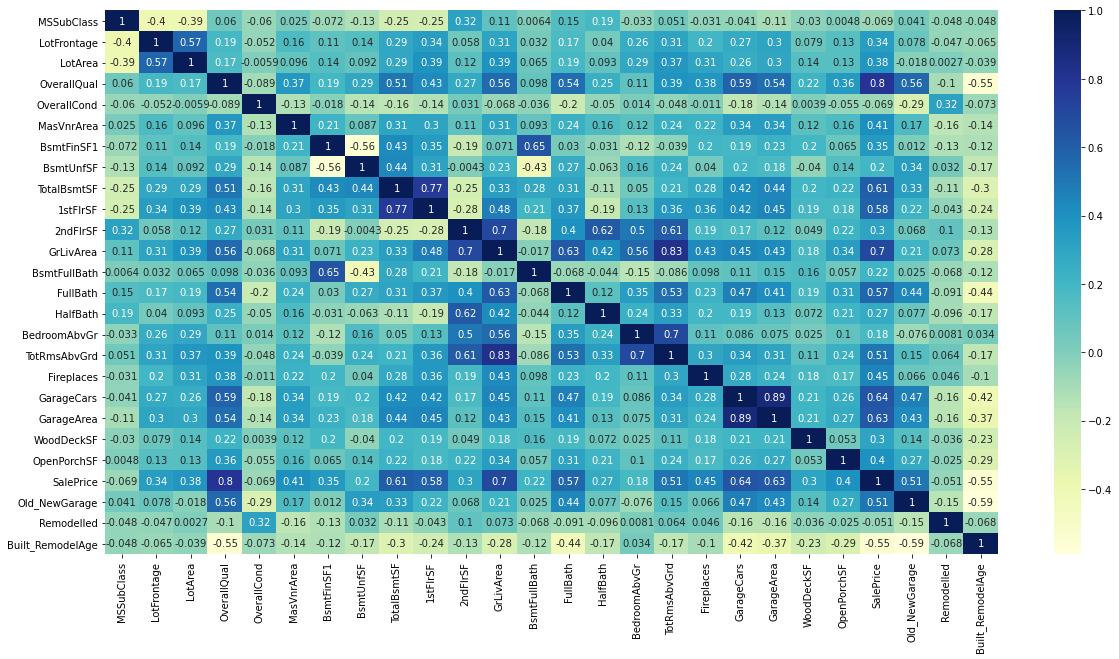

In [35]:
#visualizing the correlations using the heat map
plt.figure(figsize=(20,10))
sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show;

In [36]:
# 'TotRmsAbvGrd' and  'GarageArea' variables are dropped
house.drop(['TotRmsAbvGrd', 'GarageArea'], axis = 1, inplace = True)

In [37]:
# Checking the shape of dataset
house.shape

(1358, 46)

# 3. Data preparation

In [38]:
#categorical variables are converted to numericals
# Values are assigned to ordered lists. Sequence value for values which are in order, 
#if not sequence it is categorized 0 and 1

house['d_LotShape'] = house['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
house['d_ExterQual'] = house['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
house['d_BsmtQual'] = house['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house['d_BsmtExposure'] = house['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
house['d_BsmtFinType1'] = house['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 
                                                                 'None': 0})
house['d_HeatingQC'] = house['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house['d_KitchenQual'] = house['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house['d_FireplaceQu'] = house['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house['d_GarageFinish'] = house['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
house['d_BldgType'] = house['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 
                                                                 'None': 0 })
house['d_HouseStyle'] = house['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                                 '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
house['d_Fence'] = house['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'None': 0 })
house['d_LotConfig'] = house['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 
                                                           'None': 0  })
house['d_MasVnrType'] = house['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
house['d_SaleCondition'] = house['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 
                                                                   'Alloca': 0, 'AdjLand': 0, 'None': 0})


In [39]:
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,...,5,4,0,2,1,4,0,5,1,1
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,...,5,3,3,2,1,1,0,2,0,1
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,...,5,4,3,2,1,4,0,5,1,1
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,...,4,4,4,1,1,4,0,4,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,...,5,4,3,2,1,4,0,2,1,1


In [40]:
#drop old columns 
house = house.drop(['LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 
                                'KitchenQual', 'FireplaceQu', 'GarageFinish', 'BldgType', 'HouseStyle', 'Fence', 
                                'LotConfig', 'MasVnrType', 'SaleCondition'], axis=1)



In [41]:
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,5,4,0,2,1,4,0,5,1,1
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,5,3,3,2,1,1,0,2,0,1
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,5,4,3,2,1,4,0,5,1,1
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,4,4,4,1,1,4,0,4,0,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,5,4,3,2,1,4,0,2,1,1


In [42]:
#dummies are created for categorical variables


d_Exterior1st = pd.get_dummies(house['Exterior1st'], prefix='Exterior1st', drop_first = True)
house = pd.concat([house, d_Exterior1st], axis = 1)

d_Exterior2nd = pd.get_dummies(house['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
house = pd.concat([house, d_Exterior2nd], axis = 1)

d_Foundation = pd.get_dummies(house['Foundation'], prefix='Foundation', drop_first = True)
house = pd.concat([house, d_Foundation], axis = 1)

d_GarageType = pd.get_dummies(house['GarageType'], prefix='GarageType', drop_first = True)
house = pd.concat([house, d_GarageType], axis = 1)

d_MSZoning = pd.get_dummies(house['MSZoning'], prefix='MSZoning', drop_first = True)
house = pd.concat([house, d_MSZoning], axis = 1)

d_Neighborhood = pd.get_dummies(house['Neighborhood'], prefix='Neighborhood', drop_first = True)
house = pd.concat([house, d_Neighborhood], axis = 1)

d_RoofStyle = pd.get_dummies(house['RoofStyle'], prefix='RoofStyle', drop_first = True)
house = pd.concat([house, d_RoofStyle], axis = 1)

In [43]:
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,0,0,0,0,0,1,0,0,0,0
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,0,0,0,0,1,1,0,0,0,0
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,0,0,0,0,0,1,0,0,0,0
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,0,0,0,0,0,1,0,0,0,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,0,0,0,0,0,1,0,0,0,0


In [44]:

# drop the old columns as new ones are created

house = house.drop(['MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 
                                'GarageType'], axis=1)
house.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed
0,60,65.0,8450,7,5,196.0,706,150,856,856,...,0,0,0,0,0,1,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,...,0,0,0,0,1,1,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,...,0,0,0,0,0,1,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,...,0,0,0,0,0,1,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,...,0,0,0,0,0,1,0,0,0,0


In [45]:
house.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed
count,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,...,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000
mean,57.157585,68.771723,9434.943299,6.023564,5.590574,83.878498,415.770250,557.894698,1017.749632,1127.438881,...,0.041973,0.058910,0.015464,0.023564,0.007364,0.804124,0.008100,0.175994,0.005155,0.001473
std,42.291826,19.427951,3616.150840,1.319668,1.121361,134.061884,410.462751,429.213847,377.761875,340.208571,...,0.200602,0.235543,0.123434,0.151742,0.085527,0.397020,0.089669,0.380955,0.071637,0.038362
min,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,60.000000,7416.250000,5.000000,5.000000,0.000000,0.000000,218.250000,784.000000,865.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,50.000000,69.000000,9246.500000,6.000000,5.000000,0.000000,364.500000,477.500000,970.000000,1065.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,70.000000,78.000000,11268.750000,7.000000,6.000000,144.750000,686.000000,796.750000,1251.750000,1349.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,190.000000,182.000000,25095.000000,10.000000,9.000000,640.000000,1646.000000,2002.000000,2006.000000,2898.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1358 entries, 0 to 1458
Columns: 112 entries, MSSubClass to RoofStyle_Shed
dtypes: float64(2), int64(37), uint8(73)
memory usage: 521.2 KB


# 4. Split the data into train set and test set

In [47]:
# Assign predictor variables to X and response variable to y
X = house.drop(['SalePrice'], axis=1)
y = house['SalePrice']

In [48]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed
0,60,65.0,8450,7,5,196.0,706,150,856,856,...,0,0,0,0,0,1,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,...,0,0,0,0,1,1,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,...,0,0,0,0,0,1,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,...,0,0,0,0,0,1,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,...,0,0,0,0,0,1,0,0,0,0


In [49]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

#### Feature scaling

In [50]:

from sklearn.preprocessing import scale

# storing column names in cols
# scaling (the dataframe is converted to a numpy array)

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Neighborhood_Veenker', 'RoofStyle_Gable',
       'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard',
       'RoofStyle_Shed'],
      dtype='object', length=111)

In [51]:
# once scaling is done we will split the data into train and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [52]:
lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, 50)            
rfe = rfe.fit(X_train, y_train)

In [53]:
col = X_train.columns[rfe.support_]

# assign the 50 features selected using RFE to a dataframe and view them

temp_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp_df = temp_df.loc[temp_df['rfe_support'] == True]
temp_df.reset_index(drop=True, inplace=True)

temp_df

,Variable,rfe_support,rfe_ranking
0,LotArea,True,1
1,OverallQual,True,1
2,OverallCond,True,1
3,MasVnrArea,True,1
4,BsmtFinSF1,True,1
5,BsmtUnfSF,True,1
6,TotalBsmtSF,True,1
7,1stFlrSF,True,1
8,2ndFlrSF,True,1
9,GrLivArea,True,1


In [54]:
X_train_rfe = X_train[col]

In [55]:
X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

# 5. Ridge regression

In [124]:
# Alpha list to tune parameters
list_alpha = [0.1, 0.5, 1.0, 5.0, 20, 
 40, 70, 100, 150, 200, 250, 300, 350, 400, 450, 500, 
 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]
params = {'alpha': list_alpha}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:    1.8s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 0.5, 1.0, 5.0, 20, 40, 70, 100, 150,
                                   200, 250, 300, 350, 400, 450, 500, 550, 600,
                                   650, 700, 750, 800, 850, 900, 950, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [125]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha'] <= 1000]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010255,0.005593,0.005847,0.002378,0.1,{'alpha': 0.1},-16414.145105,-13161.519636,-16386.855160,-13668.542914,...,-14850.174631,1349.686453,5,-13115.717477,-14240.568014,-13357.074487,-14033.180109,-13842.731953,-13717.854408,419.758323
1,0.008212,0.001285,0.004553,0.000272,0.5,{'alpha': 0.5},-16413.194931,-13157.758562,-16378.633729,-13660.172714,...,-14846.790369,1349.859793,4,-13119.728969,-14240.925026,-13355.532226,-14037.669666,-13842.696216,-13719.310421,419.640549
2,0.012057,0.005528,0.005155,0.001037,1,{'alpha': 1.0},-16412.428463,-13155.913092,-16368.727121,-13650.786539,...,-14843.662424,1349.352177,2,-13124.311674,-14241.702214,-13353.805353,-14043.079137,-13843.397517,-13721.259179,419.694043
3,0.004822,0.001045,0.003098,0.000640,5,{'alpha': 5.0},-16424.775688,-13181.605645,-16301.595120,-13590.869418,...,-14835.797342,1340.435747,1,-13154.815273,-14256.913089,-13353.481821,-14081.086778,-13867.685611,-13742.796514,422.289311
4,0.005346,0.000640,0.003440,0.000605,20,{'alpha': 20},-16491.748939,-13294.553910,-16192.228708,-13477.988994,...,-14844.361629,1327.084132,3,-13234.402558,-14309.245196,-13389.966298,-14157.310568,-13933.157800,-13804.816484,422.526833


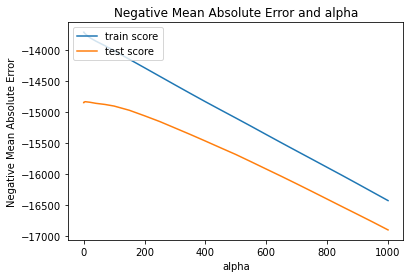

In [126]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [127]:
# Best parameter (alpha)
model_cv.best_params_

{'alpha': 5.0}

In [128]:
alpha = 5.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 4048.98617905, 12679.99816138,  4141.55313685,  2504.87478402,
        4647.01212171, -2321.15326579,  9729.2044071 ,  6981.73581297,
        9361.14323382,  9065.74559752, -2018.17239874,  7720.03904748,
        2227.52565979,  2464.29149263,  2683.74698301, -1807.11234895,
        3984.53038408,  3611.82535315,  4808.74794615,  2817.96699918,
       -7180.28409975,  2030.99390454, -9490.0567197 , -2861.99082655,
       -7992.03297748, -4159.28070036, 10242.70114916, -3798.0708471 ,
       -3197.64082305,  3204.43889604, -2670.40428522,  3397.95072428,
        5115.92514997,  3846.26637319,  3950.58693147,  1612.51411689,
        3677.63631413,  3570.43034984,  5467.25435894,  4942.15367797,
        4037.71833529,  3253.14851749,  4282.67186066, -1870.18684442,
       -1273.24994955, -1198.98023452,  3837.21259263,  9131.56336564,
       -3932.73486002,  3910.86108545])

In [129]:
alpha = 5.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

pred = ridge.predict(X_test)

In [130]:
mse = np.mean((pred - y_test)**2)
mse

686979474.1272863

In [131]:
ridge.score(X_test,y_test)

0.867626975233855

In [106]:
alpha = 5.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 4048.98617905, 12679.99816138,  4141.55313685,  2504.87478402,
        4647.01212171, -2321.15326579,  9729.2044071 ,  6981.73581297,
        9361.14323382,  9065.74559752, -2018.17239874,  7720.03904748,
        2227.52565979,  2464.29149263,  2683.74698301, -1807.11234895,
        3984.53038408,  3611.82535315,  4808.74794615,  2817.96699918,
       -7180.28409975,  2030.99390454, -9490.0567197 , -2861.99082655,
       -7992.03297748, -4159.28070036, 10242.70114916, -3798.0708471 ,
       -3197.64082305,  3204.43889604, -2670.40428522,  3397.95072428,
        5115.92514997,  3846.26637319,  3950.58693147,  1612.51411689,
        3677.63631413,  3570.43034984,  5467.25435894,  4942.15367797,
        4037.71833529,  3253.14851749,  4282.67186066, -1870.18684442,
       -1273.24994955, -1198.98023452,  3837.21259263,  9131.56336564,
       -3932.73486002,  3910.86108545])

In [89]:
# features and coefficients in dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,LotArea,4069.6134
1,OverallQual,12667.5886
2,OverallCond,4077.0220
3,MasVnrArea,2527.3370
4,BsmtFinSF1,4873.3092
5,BsmtUnfSF,-2039.1186
6,TotalBsmtSF,9315.2381
7,1stFlrSF,6516.9004
8,2ndFlrSF,8565.5468
9,GrLivArea,9755.9585


In [90]:

# Features and Cf assigned to a dictionary 

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

{'LotArea': 4069.6134,
 'OverallQual': 12667.5886,
 'OverallCond': 4077.022,
 'MasVnrArea': 2527.337,
 'BsmtFinSF1': 4873.3092,
 'BsmtUnfSF': -2039.1186,
 'TotalBsmtSF': 9315.2381,
 '1stFlrSF': 6516.9004,
 '2ndFlrSF': 8565.5468,
 'GrLivArea': 9755.9585,
 'BedroomAbvGr': -1926.4977,
 'GarageCars': 7619.7582,
 'WoodDeckSF': 2219.2974,
 'OpenPorchSF': 2496.1353,
 'Old_NewGarage': 2656.5311,
 'Built_RemodelAge': -1830.9954,
 'd_ExterQual': 4082.0583,
 'd_BsmtExposure': 3668.8142,
 'd_KitchenQual': 4854.7114,
 'd_GarageFinish': 2825.1758,
 'd_BldgType': -7098.7186,
 'd_SaleCondition': 2071.6881,
 'Exterior1st_CemntBd': -7289.3136,
 'Exterior1st_MetalSd': -2750.8402,
 'Exterior1st_VinylSd': -6957.7843,
 'Exterior1st_Wd Sdng': -4056.5805,
 'Exterior2nd_CmentBd': 8155.9924,
 'Exterior2nd_HdBoard': -3661.719,
 'Exterior2nd_Plywood': -3103.9847,
 'Exterior2nd_VinylSd': 2342.7357,
 'Exterior2nd_Wd Shng': -2648.8536,
 'Foundation_CBlock': 3172.1689,
 'Foundation_PConc': 4893.0663,
 'Foundation_Sla

In [91]:
# Features and Cfs assigned to a dictionary 

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))

In [92]:

# RFE to minimize feature to 15
X_train_ridge = X_train[ridge_df.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# RFE
rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_ridge, y_train)

In [93]:

# Deriving coefficient values

def find(x):
    return ridge_coeff_dict[x]

# top 10 features to a temp dataframe 

temp1_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(find)
temp1_df = temp1_df.sort_values(by=['Coefficient'], ascending=False)
temp1_df = temp1_df.head(10)
temp1_df

,Features,rfe_support,rfe_ranking,Coefficient
0,OverallQual,True,1,12667.5886
5,GrLivArea,True,1,9755.9585
2,TotalBsmtSF,True,1,9315.2381
14,Neighborhood_NridgHt,True,1,9036.3781
4,2ndFlrSF,True,1,8565.5468
12,Exterior2nd_CmentBd,True,1,8155.9924
6,GarageCars,True,1,7619.7582
3,1stFlrSF,True,1,6516.9004
1,BsmtFinSF1,True,1,4873.3092
8,d_KitchenQual,True,1,4854.7114


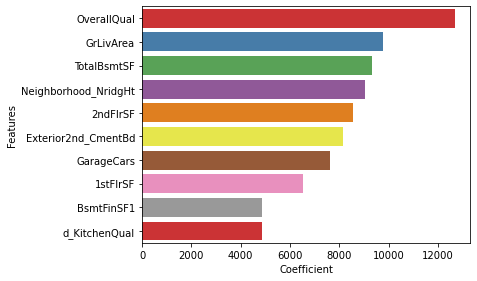

In [94]:
# bar plot to determine the parameters affecting the sale price

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp1_df)
plt.show()

# 6. Lasso

In [71]:

lasso = Lasso()
# Cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:    2.1s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.1, 0.5, 1.0, 5.0, 20, 40, 70, 100, 150,
                                   200, 250, 300, 350, 400, 450, 500, 550, 600,
                                   650, 700, 750, 800, 850, 900, 950, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [72]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.026740,0.005492,0.002621,0.000162,0.1,{'alpha': 0.1},-16414.473421,-13163.100442,-16439.597396,-13670.507682,...,-14861.346505,1361.170213,5,-13114.720330,-14240.509479,-13357.466840,-14032.235404,-13842.843131,-13717.555037,419.827436
1,0.021539,0.006274,0.002784,0.000452,0.5,{'alpha': 0.5},-16414.866494,-13163.918320,-16428.004448,-13669.409919,...,-14859.248157,1358.530292,4,-13114.659427,-14240.389400,-13357.407095,-14032.789336,-13842.806310,-13717.610314,419.906170
2,0.020262,0.006282,0.002687,0.000327,1,{'alpha': 1.0},-16415.401332,-13164.934753,-16385.997382,-13668.059682,...,-14851.132877,1348.963122,2,-13114.706275,-14240.237912,-13357.010177,-14033.318725,-13842.757768,-13717.606171,419.999769
3,0.014905,0.001523,0.002466,0.000096,5,{'alpha': 5.0},-16419.972593,-13173.083121,-16372.146735,-13657.792976,...,-14850.820600,1346.333017,1,-13115.830801,-14239.029979,-13355.485077,-14036.917159,-13842.370578,-13717.926719,420.160260
4,0.013743,0.003185,0.002713,0.000360,20,{'alpha': 20},-16445.170098,-13208.086845,-16321.331734,-13624.522781,...,-14853.689196,1337.133494,3,-13121.505712,-14239.189043,-13353.989826,-14052.526487,-13847.010841,-13722.844382,421.516616


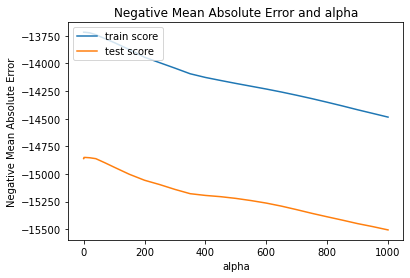

In [73]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [74]:
model_cv.best_params_

{'alpha': 5.0}

In [107]:
#It is confirmed by graph as well

alpha = 5.0

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=5.0)

In [108]:
alpha = 5.0
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)

pred = lasso.predict(X_test)

In [109]:
mse = np.mean((pred - y_test)**2)
mse

692759479.2427036

In [110]:
lasso.score(X_test,y_test)

0.8665132348833684

In [99]:
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,LotArea,4010.3586
1,OverallQual,12695.8315
2,OverallCond,4191.9237
3,MasVnrArea,2478.2254
4,BsmtFinSF1,4392.7196
5,BsmtUnfSF,-2646.7598
6,TotalBsmtSF,10166.2557
7,1stFlrSF,8733.7902
8,2ndFlrSF,11724.1445
9,GrLivArea,6648.7989


In [111]:
lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'LotArea': 4015.5664462389323,
 'OverallQual': 12662.991196905054,
 'OverallCond': 4206.383293569565,
 'MasVnrArea': 2477.6584502739815,
 'BsmtFinSF1': 4348.002349001189,
 'BsmtUnfSF': -2700.299932543721,
 'TotalBsmtSF': 10242.615874391618,
 '1stFlrSF': 9023.216817471337,
 '2ndFlrSF': 12114.107644535306,
 'GrLivArea': 6251.395252456276,
 'BedroomAbvGr': -2104.250900006819,
 'GarageCars': 7830.059158751654,
 'WoodDeckSF': 2231.0978766625035,
 'OpenPorchSF': 2415.0579760179444,
 'Old_NewGarage': 2717.562179042699,
 'Built_RemodelAge': -1792.0322412970568,
 'd_ExterQual': 3844.4048562632497,
 'd_BsmtExposure': 3515.795479329828,
 'd_KitchenQual': 4762.4856607553975,
 'd_GarageFinish': 2803.2374279353103,
 'd_BldgType': -7244.360660685416,
 'd_SaleCondition': 1979.4851551286877,
 'Exterior1st_CemntBd': -13010.201368293572,
 'Exterior1st_MetalSd': -2914.9766106991297,
 'Exterior1st_VinylSd': -9245.313351646826,
 'Exterior1st_Wd Sdng': -4207.989216631212,
 'Exterior2nd_CmentBd': 13656.42024

In [112]:
# RFE to minimise the features to 15

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [113]:
# Deriving the Cf values

def find(x):
    return lasso_coeff_dict[x]

# top 10 features to a temp dataframe 
temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(10)
temp2_df

,Features,rfe_support,rfe_ranking,Coefficient
12,Exterior2nd_CmentBd,True,1,13656.420242
0,OverallQual,True,1,12662.991197
4,2ndFlrSF,True,1,12114.107645
2,TotalBsmtSF,True,1,10242.615874
14,Neighborhood_NridgHt,True,1,9238.945729
3,1stFlrSF,True,1,9023.216817
6,GarageCars,True,1,7830.059159
5,GrLivArea,True,1,6251.395252
8,d_KitchenQual,True,1,4762.485661
13,Exterior2nd_VinylSd,True,1,4369.154758


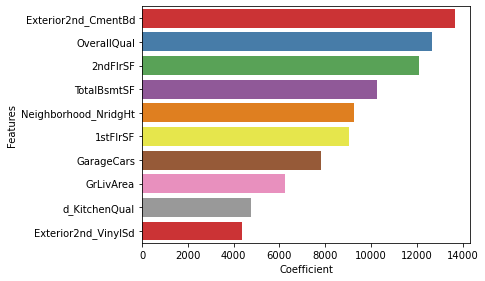

In [114]:
# bar plot to determine the variables that would affect sale price

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp2_df)
plt.show()

# 7. Conclusion